In [194]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
import seaborn as sns
#ignoring unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [195]:
df = pd.read_csv(r'C:\Users\USER\train.csv')

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [197]:
null_percentage_df = pd.DataFrame(columns=['Columns','Null Values','Null Value Percentage'])

In [198]:
def null_percentage (dataframe):
    null_percentage_df = pd.DataFrame(columns=['Columns','Null Values','Null Value Percentage'])
    columns_list = dataframe.columns
    for i in columns_list:
        null_values = df[i].isna().sum()
        percentage_null = (null_values/len(dataframe))*100
        append_list = [i,null_values,percentage_null]
        null_percentage_df.loc[len(null_percentage_df)] = append_list
    return null_percentage_df

In [199]:
null_check= null_percentage(df)

In [200]:
null_check=null_check[null_check['Null Values']!=0]

In [201]:
len(null_check)

19

In [202]:
null_check[((null_check['Null Value Percentage']>40) & (null_check['Null Values']>0))]

,Columns,Null Values,Null Value Percentage
6,Alley,1369,93.767123
57,FireplaceQu,690,47.260274
72,PoolQC,1453,99.520548
73,Fence,1179,80.753425
74,MiscFeature,1406,96.301370


In [203]:
# Dropping the columns with Null values greater than 40%
drop_null_list=list(null_check['Columns'][null_check['Null Value Percentage']>40])

In [204]:
df=df.drop(drop_null_list,axis=1)

In [205]:
null_check2 = null_check[null_check['Null Value Percentage']<40].sort_values(by=['Null Value Percentage'],ascending=False)

In [206]:
null_check2

,Columns,Null Values,Null Value Percentage
3,LotFrontage,259,17.739726
58,GarageType,81,5.547945
59,GarageYrBlt,81,5.547945
60,GarageFinish,81,5.547945
63,GarageQual,81,5.547945
64,GarageCond,81,5.547945
32,BsmtExposure,38,2.602740
35,BsmtFinType2,38,2.602740
30,BsmtQual,37,2.534247
31,BsmtCond,37,2.534247


In [207]:
num_null_list=list(df[list(null_check2['Columns'])].select_dtypes(['int','float']).columns)
num_null_list

['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

In [208]:
df[num_null_list].describe()

,LotFrontage,GarageYrBlt,MasVnrArea
count,1201.000000,1379.000000,1452.000000
mean,70.049958,1978.506164,103.685262
std,24.284752,24.689725,181.066207
min,21.000000,1900.000000,0.000000
25%,59.000000,1961.000000,0.000000
50%,69.000000,1980.000000,0.000000
75%,80.000000,2002.000000,166.000000
max,313.000000,2010.000000,1600.000000


In [209]:
#Imputing LotFrontage with median due to outiers and rows in other two columns can be dropped

df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

# Dropping rows for the Null values since we have less percentage of missing data for other columns
df.dropna(axis='rows', inplace=True)

In [210]:
# Dropping the Id column
df = df.drop(columns=['Id'])

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1338 non-null   int64  
 1   MSZoning       1338 non-null   object 
 2   LotFrontage    1338 non-null   float64
 3   LotArea        1338 non-null   int64  
 4   Street         1338 non-null   object 
 5   LotShape       1338 non-null   object 
 6   LandContour    1338 non-null   object 
 7   Utilities      1338 non-null   object 
 8   LotConfig      1338 non-null   object 
 9   LandSlope      1338 non-null   object 
 10  Neighborhood   1338 non-null   object 
 11  Condition1     1338 non-null   object 
 12  Condition2     1338 non-null   object 
 13  BldgType       1338 non-null   object 
 14  HouseStyle     1338 non-null   object 
 15  OverallQual    1338 non-null   int64  
 16  OverallCond    1338 non-null   int64  
 17  YearBuilt      1338 non-null   int64  
 18  YearRemo

In [212]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,56.136024,70.438714,10706.294469,6.219731,5.596413,1973.029148,1985.668909,110.360239,464.234679,49.218236,582.494768,1095.947683,1176.221973,357.141256,4.221973,1537.585202,0.438714,0.060538,1.575486,0.402840,2.864723,1.029895,6.550075,0.648729,1978.596413,1.87145,501.449925,99.384903,47.782511,21.263827,3.585949,16.43423,3.010463,42.932735,6.331839,2007.805680,186761.782511
std,41.252576,22.170305,10336.621126,1.324472,1.078124,29.563540,20.296463,185.604816,458.792420,166.196584,439.950528,405.554435,386.644986,440.324982,40.712916,520.579960,0.515630,0.241685,0.547570,0.504185,0.776677,0.174697,1.585071,0.645393,24.773741,0.63428,186.761863,127.537065,65.362562,60.843964,30.224622,58.05159,41.961337,508.056255,2.699437,1.330691,78913.847668
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.00000,160.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7744.000000,5.000000,5.000000,1956.000000,1968.000000,0.000000,0.000000,0.000000,248.000000,819.750000,894.000000,0.000000,0.000000,1160.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.00000,377.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.000000,2007.000000,135000.000000
50%,50.000000,69.000000,9600.000000,6.000000,5.000000,1976.000000,1994.500000,0.000000,413.000000,0.000000,489.000000,1021.500000,1098.000000,0.000000,0.000000,1480.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.00000,484.000000,6.000000,28.000000,0.000000,0.000000,0.00000,0.000000,0.000000,6.000000,2008.000000,168500.000000
75%,70.000000,80.000000,11760.750000,7.000000,6.000000,2001.000000,2004.000000,174.000000,733.000000,0.000000,815.750000,1324.000000,1414.000000,740.500000,0.000000,1791.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.00000,583.000000,174.500000,70.000000,0.000000,0.000000,0.00000,0.000000,0.000000,8.000000,2009.000000,220000.000000
90%,120.000000,93.000000,14575.900000,8.000000,7.000000,2006.000000,2007.000000,340.000000,1079.900000,134.100000,1242.700000,1616.300000,1686.300000,975.600000,0.000000,2175.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.00000,772.600000,264.300000,130.000000,109.200000,0.000000,0.00000,0.000000,0.000000,10.000000,2010.000000,283624.100000
95%,160.000000,105.000000,17508.850000,8.000000,8.000000,2007.000000,2007.000000,464.300000,1280.300000,412.350000,1480.300000,1754.500000,1838.150000,1151.150000,0.000000,2485.300000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.00000,857.150000,342.300000,172.300000,180.450000,0.000000,168.00000,0.000000,0.000000,11.000000,2010.000000,335000.000000
99%,190.000000,135.890000,39727.700000,10.000000,9.000000,2009.000000,2009.000000,808.600000,1593.790000,858.640000,1798.

<AxesSubplot:>

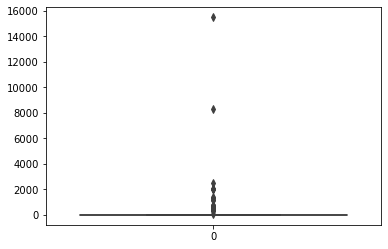

In [213]:
sns.boxplot(data=df['MiscVal'])

In [214]:
#Common function to remove outliers in numerical columns above 95th percentile
def remove_outliers(x,y):
    q1 = x[y].quantile(0.05)
    q3 = x[y].quantile(0.95)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

In [215]:
jointplot_list = ['GrLivArea','LotFrontage','LotArea','1stFlrSF','2ndFlrSF','OverallQual','OverallCond']

In [216]:
'GrLivArea','LotFrontage','LotArea','1stFlrSF','2ndFlrSF','OverallQual','OverallCond'

('GrLivArea',
 'LotFrontage',
 'LotArea',
 '1stFlrSF',
 '2ndFlrSF',
 'OverallQual',
 'OverallCond')

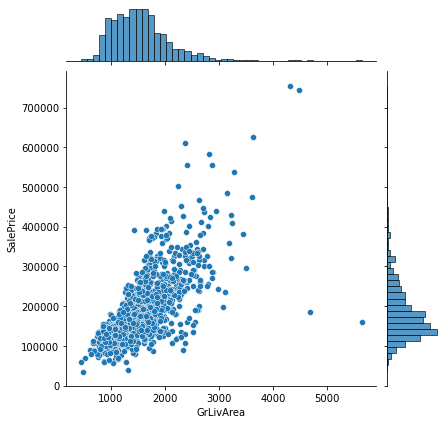

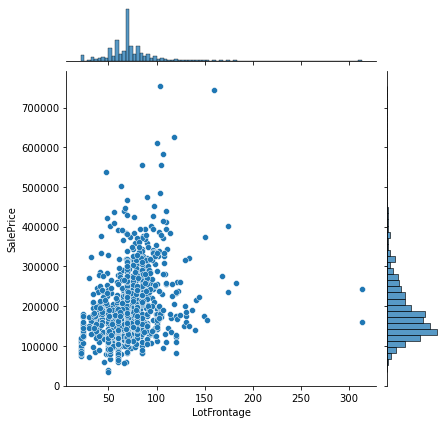

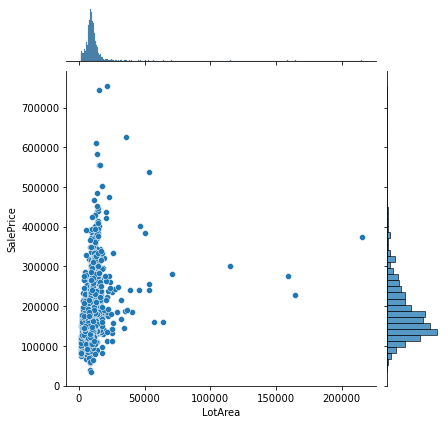

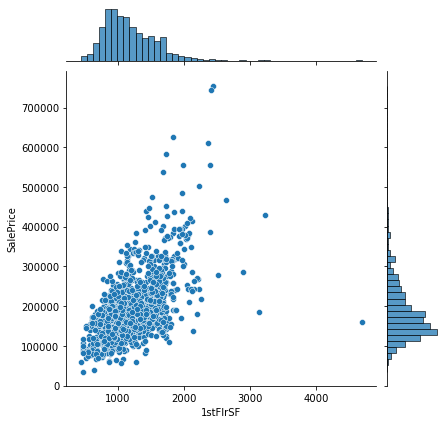

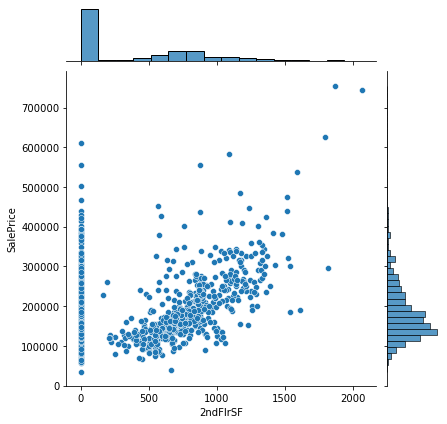

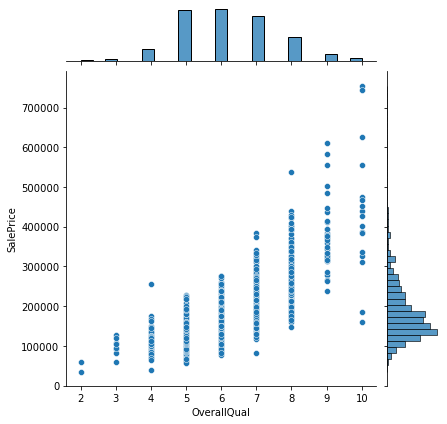

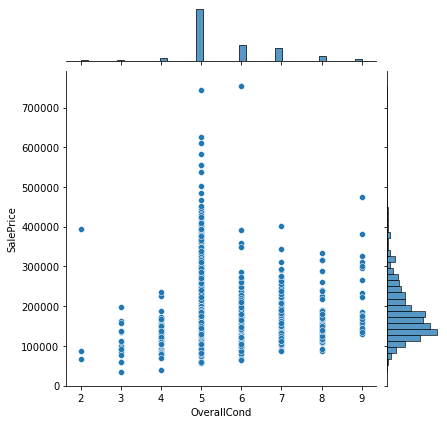

In [217]:
#Visualising Outliers using jointplots
for i in jointplot_list:
    sns.jointplot(x=i, y='SalePrice', data=df)

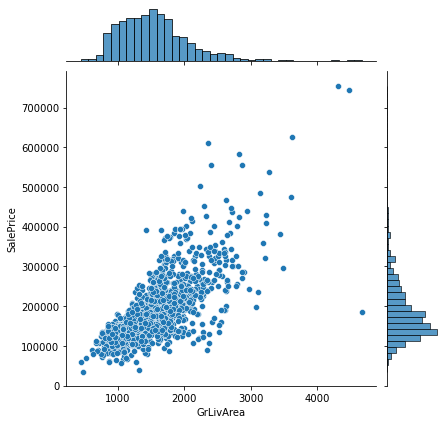

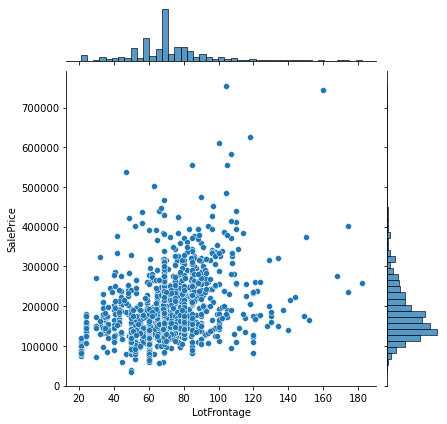

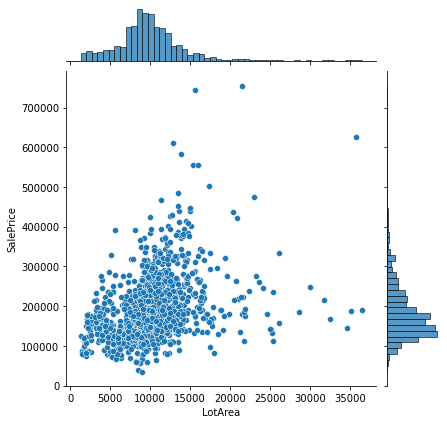

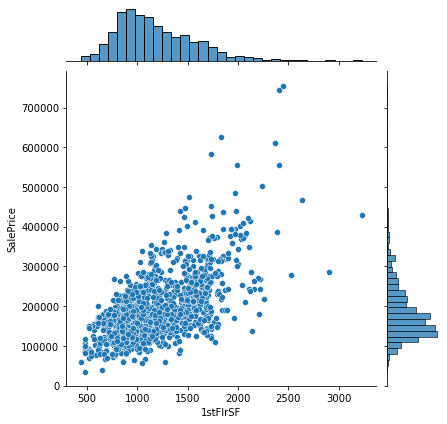

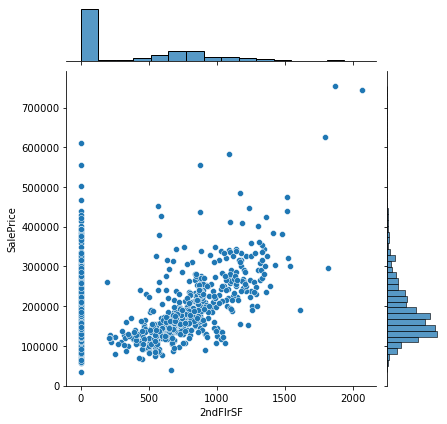

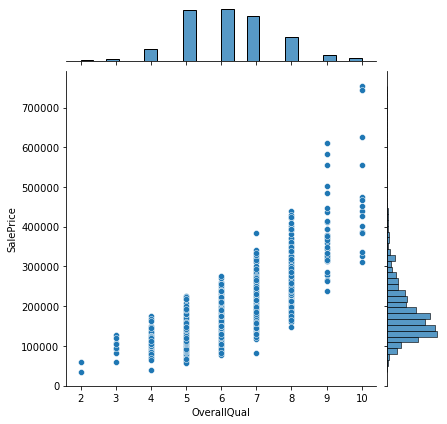

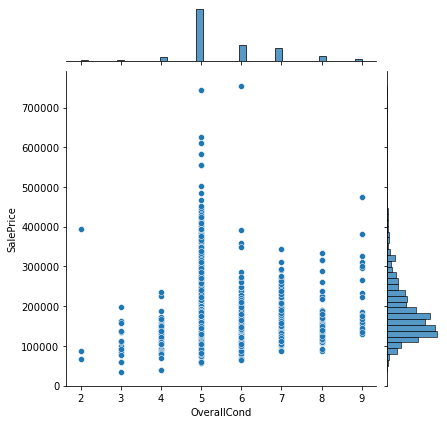

In [218]:
for i in jointplot_list:
    df=remove_outliers(df,i)
    sns.jointplot(x=i, y='SalePrice', data=df)

In [219]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000
mean,56.248109,70.007564,9886.515885,6.210287,5.593797,1973.048411,1985.594554,109.039334,454.231467,47.889561,585.009077,1087.130106,1167.256430,355.691377,4.273071,1527.220877,0.430408,0.060514,1.571861,0.403177,2.863843,1.030257,6.534039,0.636157,1978.669440,1.866868,499.652042,97.141452,47.233737,21.483359,3.629349,16.341906,2.683812,42.544629,6.323752,2007.804841,185608.975038
std,41.240608,19.999317,4214.681315,1.317081,1.078616,29.611296,20.313677,183.402665,430.537334,163.170424,440.630680,375.919012,368.807521,438.386122,40.956065,499.495007,0.508890,0.241680,0.543124,0.504414,0.771115,0.175721,1.566340,0.635793,24.767023,0.634946,185.028970,123.571175,64.328893,61.163870,30.404520,57.970139,40.120294,510.629879,2.695418,1.332540,77966.201244
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7700.000000,5.000000,5.000000,1956.000000,1968.000000,0.000000,0.000000,0.000000,252.000000,817.250000,894.000000,0.000000,0.000000,1154.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,372.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,135000.000000
50%,50.000000,69.000000,9571.500000,6.000000,5.000000,1976.000000,1994.000000,0.000000,405.000000,0.000000,490.000000,1015.000000,1096.000000,0.000000,0.000000,1477.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,484.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,167950.000000
75%,70.000000,80.000000,11638.500000,7.000000,6.000000,2001.000000,2004.000000,173.500000,730.250000,0.000000,816.000000,1313.250000,1392.000000,739.000000,0.000000,1785.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,582.750000,171.000000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,217000.000000
90%,120.000000,92.000000,14199.100000,8.000000,7.000000,2006.000000,2006.000000,336.900000,1063.500000,124.800000,1251.700000,1604.000000,1678.600000,974.100000,0.000000,2160.700000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,769.800000,264.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,280900.000000
95%,160.000000,103.950000,16559.250000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1273.800000,399.800000,1481.900000,1745.800000,1827.900000,1142.000000,0.000000,2467.900000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,9.950000,2.000000,2007.000000,3.000000,855.850000,334.900000,170.000000,182.850000,0.000000,167.850000,0.000000,0.000000,11.000000,2010.000000,328855.000000
99%,190.000000,130.000000,25075.050000,10.000000,9.000000,2009.000000,2009.000000,810.120000,1567.000000,8

##### Observations:
- There are no major outliers seen, only few features have minor outliers
- Since we have lesser data, we can avoid them

#### Creating Derived Variables

In [220]:
# Converting dates (YearBuilt, YearRemodAdd, GarageYrBlt) to days (DiffYearBuilt, DiffYearRemodAdd, DiffGarageYrBlt) from today
df['current_age'] = pd.datetime.now().year - df['YearBuilt']
df['remod_age'] = pd.datetime.now().year - df['YearRemodAdd']
df['garage_age'] = pd.datetime.now().year - df['GarageYrBlt']
df['selling_Age'] = df['YrSold'] - df['YearBuilt']

#dropping columns since we have derived data from them
df = df.drop(['MoSold'], axis = 1)
df = df.drop(['YrSold'], axis = 1)
df = df.drop(['YearBuilt'], axis = 1)
df = df.drop(['YearRemodAdd'], axis = 1)

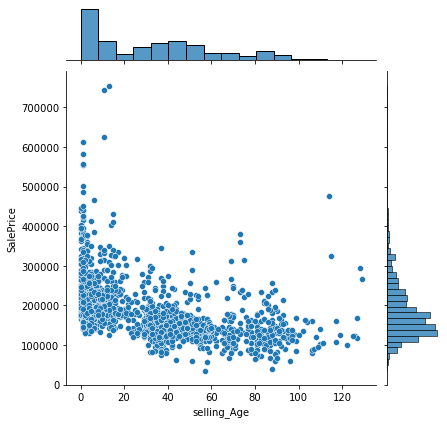

In [221]:
sns.jointplot(x='selling_Age', y='SalePrice', data=df)

##### Observations:
- New properties have higher price than older property.

In [222]:
cols = ['Street','Utilities','MiscVal', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Functional' ]
for col in cols:
    print(df[col].value_counts())
    print('\n')

Pave    1318
Grvl       4
Name: Street, dtype: int64


AllPub    1321
NoSeWa       1
Name: Utilities, dtype: int64


0        1277
400        10
500         6
2000        4
600         4
700         4
450         3
480         2
350         1
620         1
1150        1
8300        1
1400        1
560         1
1300        1
54          1
1200        1
800         1
15500       1
2500        1
Name: MiscVal, dtype: int64


CompShg    1304
Tar&Grv       7
WdShake       5
WdShngl       4
Metal         1
Roll          1
Name: RoofMatl, dtype: int64


Norm      1309
Feedr        5
Artery       2
RRNn         2
PosA         1
PosN         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64


GasA    1303
GasW      15
Grav       3
OthW       1
Name: Heating, dtype: int64


TA    1271
Fa      33
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


Typ     1242
Min2      30
Min1      26
Maj1      10
Mod        9
Maj2       4
Sev        1
Name: Functional, dtype: int64



In [223]:
df = df.drop(cols,axis=1)

In [224]:
numeric_columns = list(df.select_dtypes(['int','float']))

In [225]:
len(numeric_columns)

36

In [226]:
categorical_columns = list(df.select_dtypes(['object']))

In [227]:
len(categorical_columns)

31

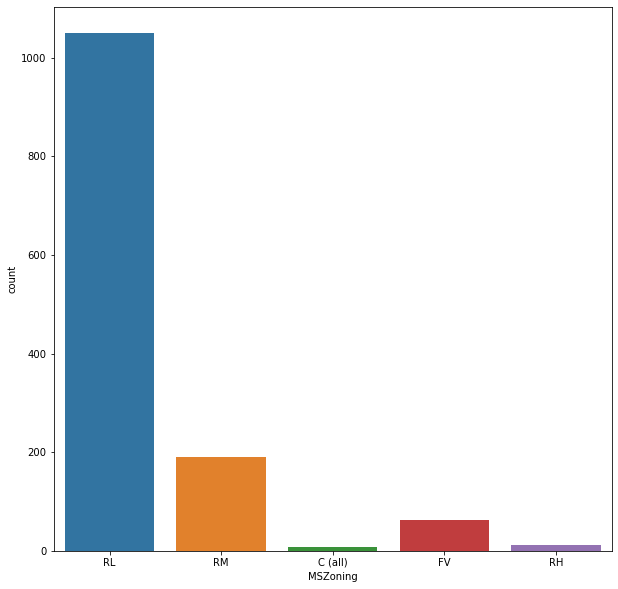

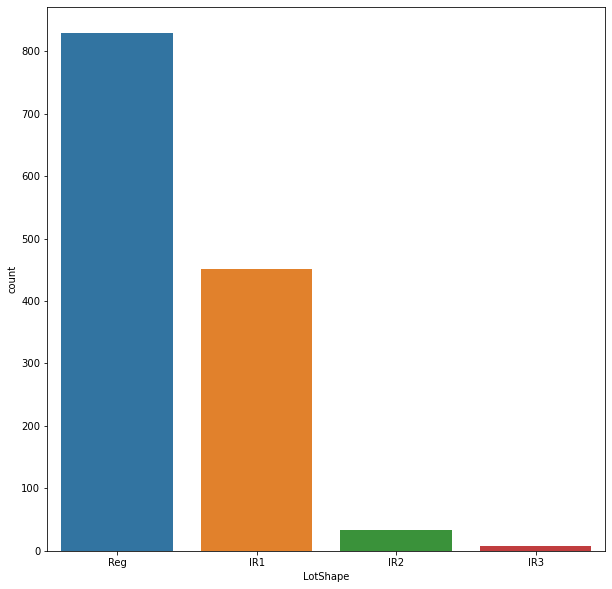

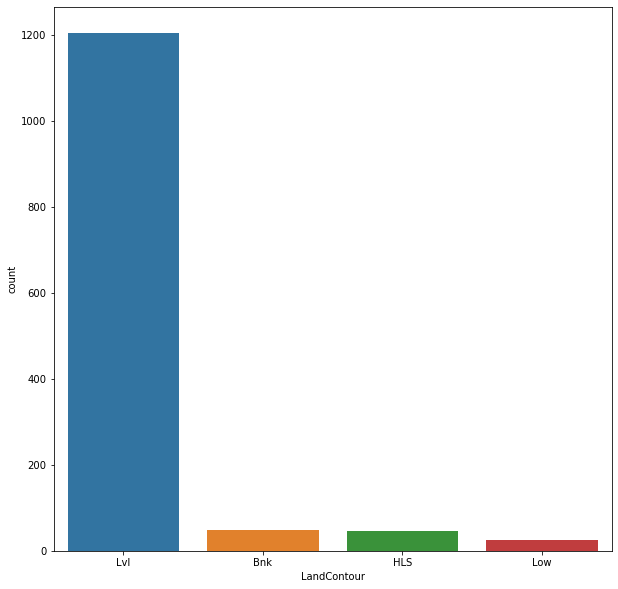

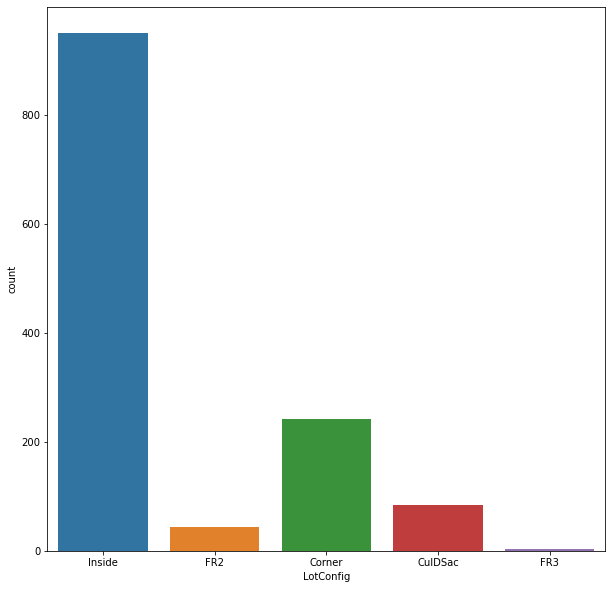

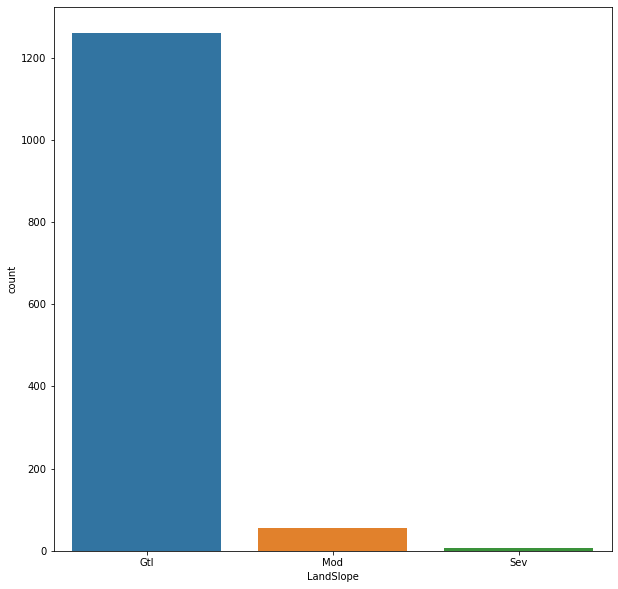

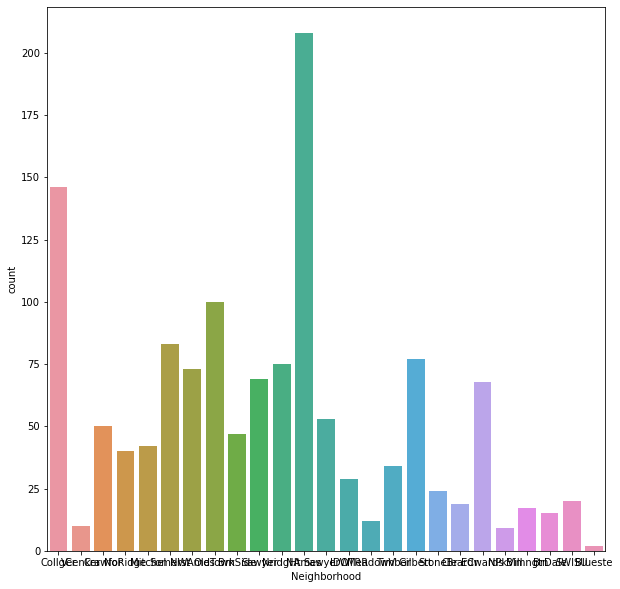

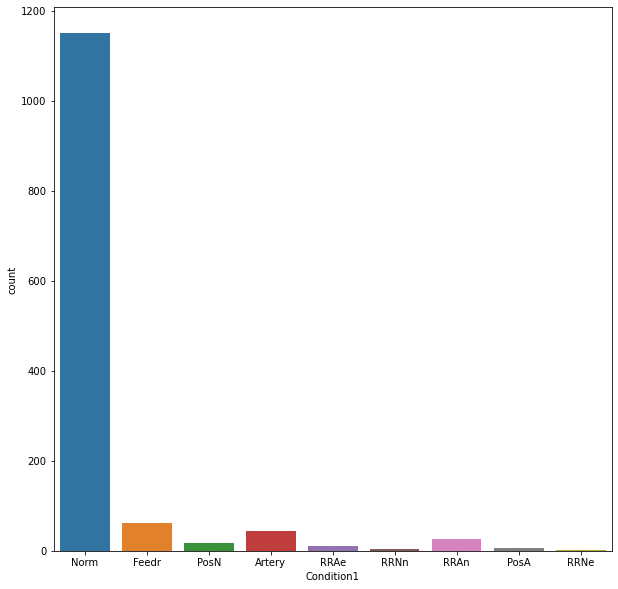

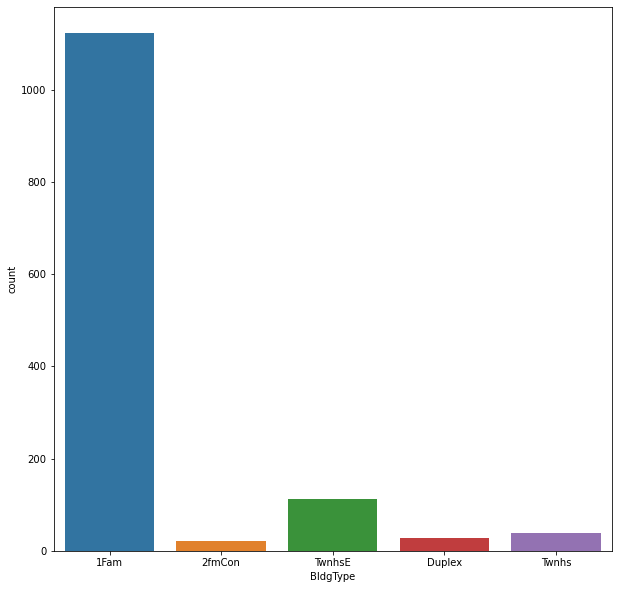

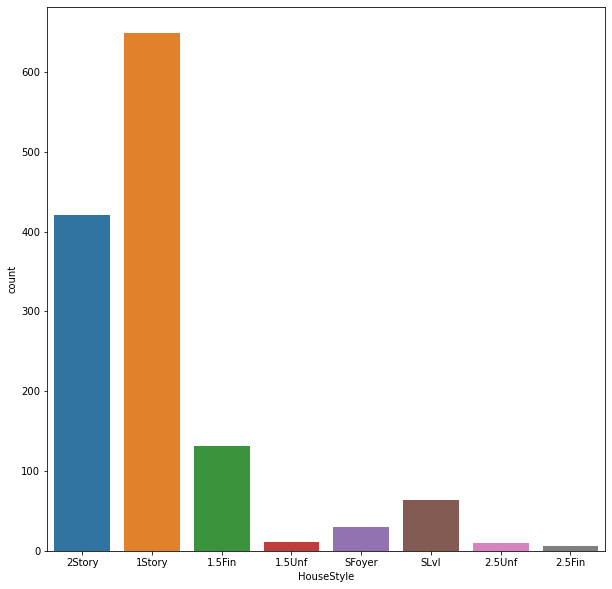

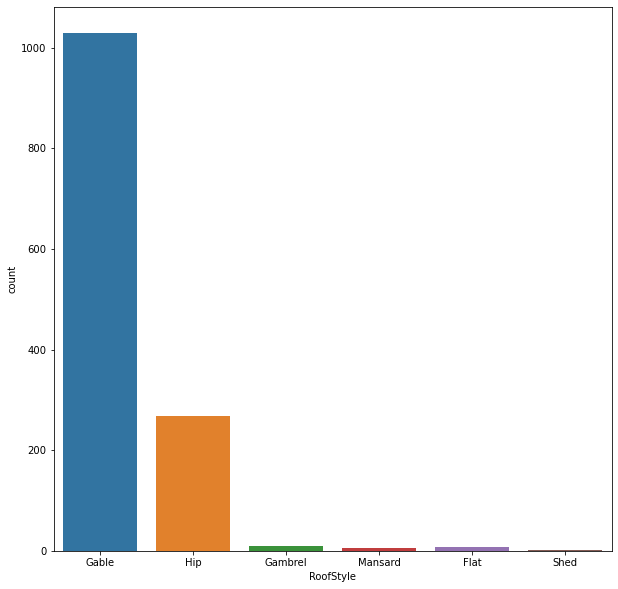

In [228]:
#Visualizing first 10 categorical columns
for i in categorical_columns[0:10]:
    plt.figure(figsize=(10, 10))
    sns.countplot(x =i,  data = df)

### Observation

- Residential Low Density has higher sales
- Paved road access to property has higher sales
- Regular shape of property has higher sales
- Leveled land contour has higher sales
- All public utilities,inside lot configuration with gentle slope has higher sales

In [229]:
#creating a function for boxplots, to compare the distribution of categorical columns vs sale price
def box_plot(col):
    for i,c in enumerate(col,1):
        ax=plt.subplot(25,2,i)
        plt.xticks(rotation=90)
        sns.boxplot(x = c, y ='SalePrice', data = df,ax=ax)

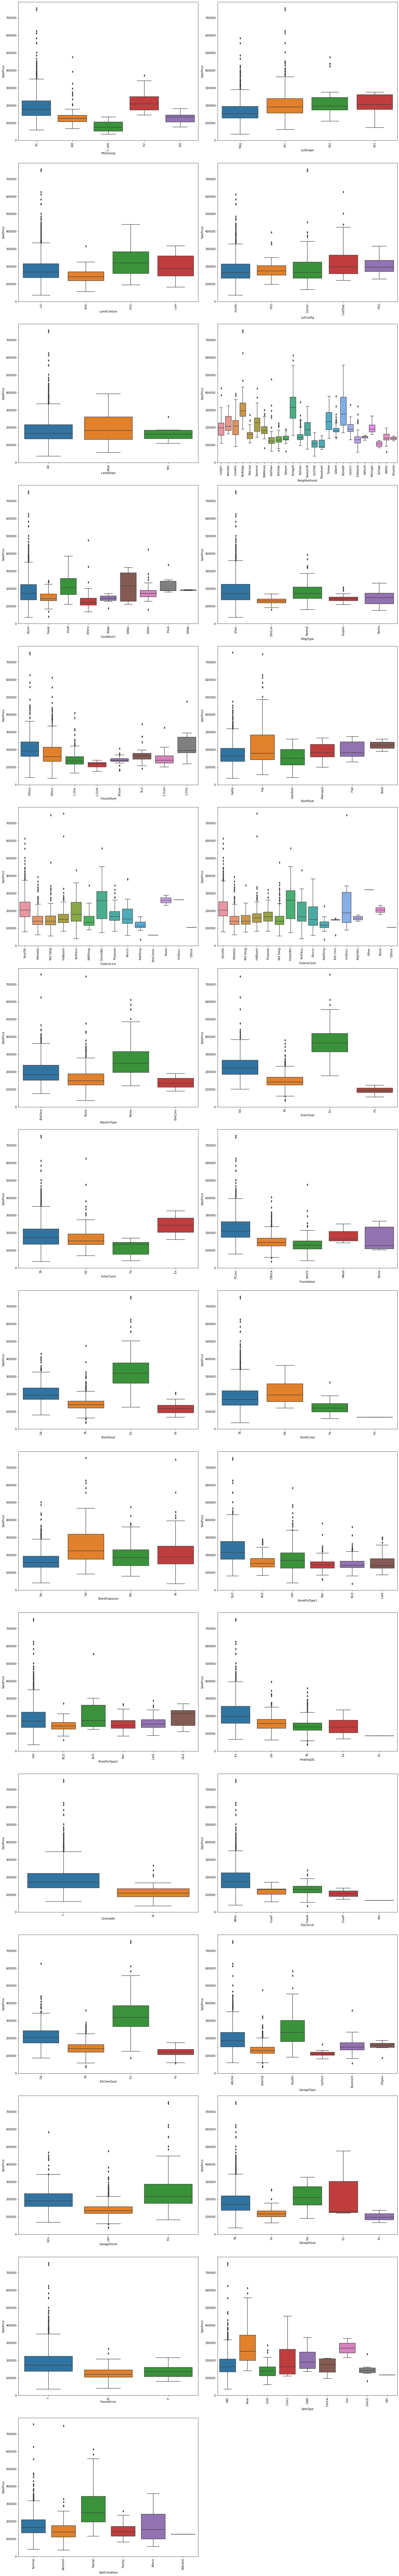

In [230]:
#visualizing boxplots of all categorical columns
plt.figure(figsize=(20,200))
box_plot(categorical_columns)
plt.tight_layout()
plt.show()

### Observations :

- Excellent condition of the basement has higher price
- Price of the property is high for central air condition
- Excellent kitchen quality and excellent outer quality has higher price

<AxesSubplot:>

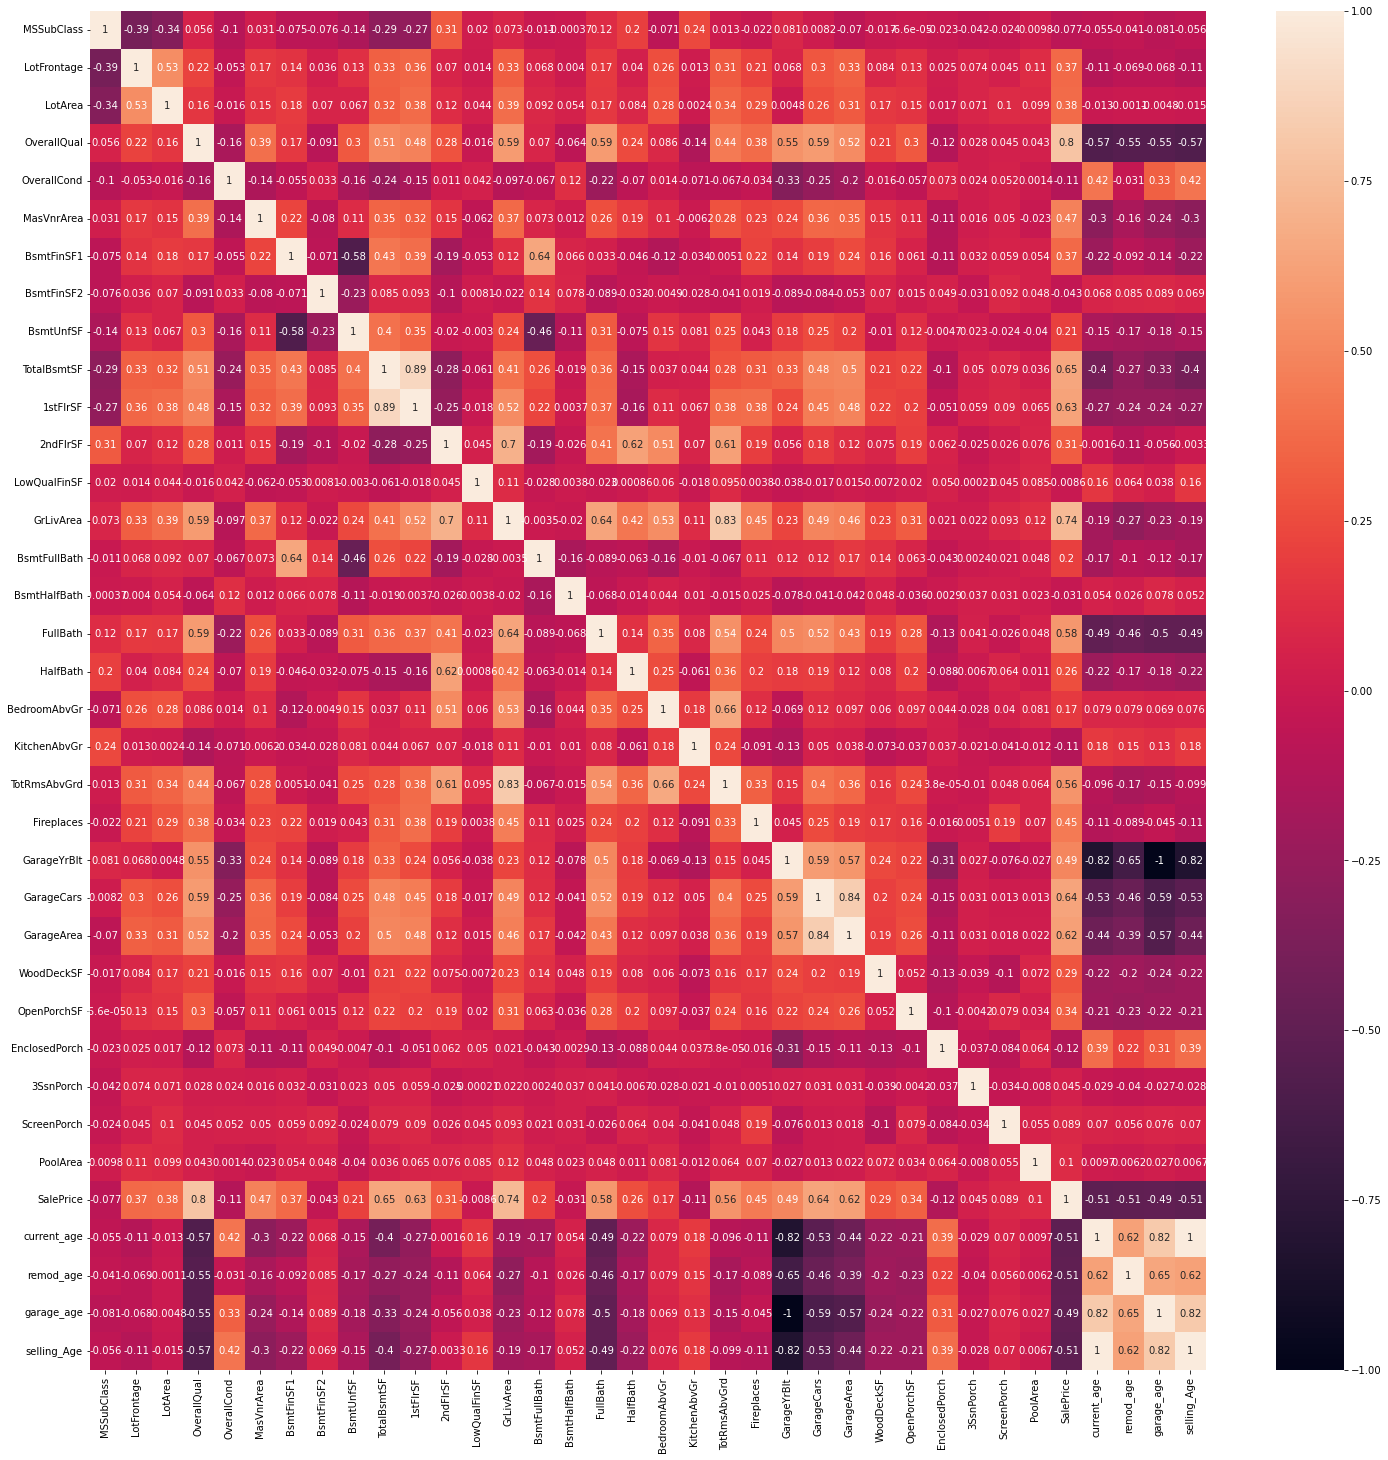

In [231]:
#creating correlation matrix and visualizing heatmap
corr_mat = df.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corr_mat,annot= True)

### Observations :

- Overall quality, living area, Total square feet of basement area are some of the highly correlated columns with price
- There are also multicollinearity


In [232]:
#filtering out highly correlated features (more than 0.5 correlation) with dependent variable
corr_features = corr_mat[abs(corr_mat['SalePrice']) > 0.5]['SalePrice'].sort_values(ascending=False)
print(corr_features[1:])
corr_cols = [i for i in corr_features.index]

OverallQual     0.795054
GrLivArea       0.739458
TotalBsmtSF     0.646982
GarageCars      0.640330
1stFlrSF        0.630175
GarageArea      0.615792
FullBath        0.577952
TotRmsAbvGrd    0.558958
remod_age      -0.507196
current_age    -0.513327
selling_Age    -0.513748
Name: SalePrice, dtype: float64


<Figure size 3600x4320 with 0 Axes>

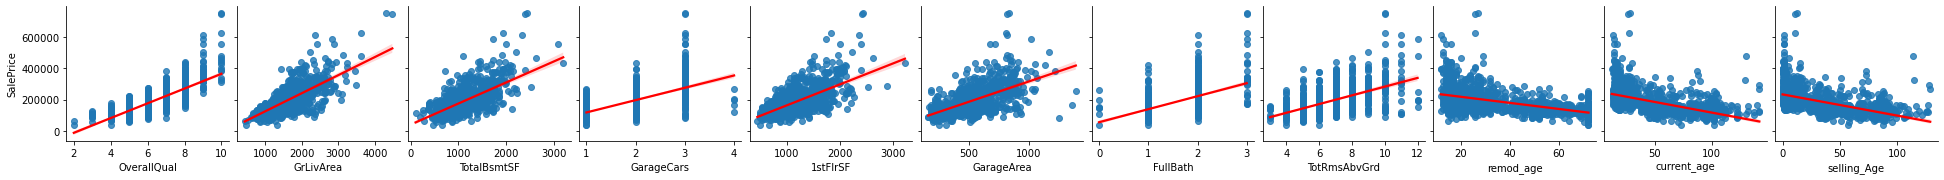

In [233]:
# Analysing/visualizing the highly correlated columns
plt.figure(figsize = (50,60))

sns.pairplot(data=df,x_vars=corr_cols[1:],y_vars=corr_cols[0], kind ='reg',plot_kws={'line_kws':{'color':'red'}})
plt.show()

## STEP 4: Data Preprocessing

- Creating dummy variables 

In [234]:
#creating dummy variables for all categorical columns
dummies = pd.get_dummies(df[categorical_columns], drop_first = True)

# Add the results to the original housing dataframe
df = pd.concat([df, dummies], axis = 1)

#dropping the orginal columns since we created dummies
df.drop(categorical_columns, axis = 1, inplace = True)

df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,current_age,remod_age,garage_age,selling_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,...,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,208500,19,19,19.0,5,0,0,1,0,0,0,1,0,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,181500,46,46,46.0,31,0,0,1,0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,223500,21,20,21.0,7,0,0,1,0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,140000,107,52,24.0,91,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,250000,22,22,22.0,8,0,0,1,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

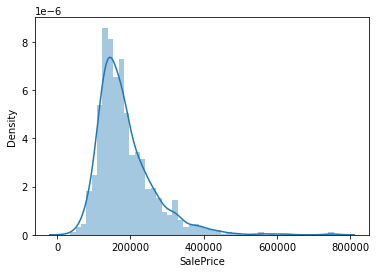

In [235]:
#Looking at the Target Variable
sns.distplot(df['SalePrice'])

### Observation 

- SalePrice is skewd to left. So, using log transformation

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

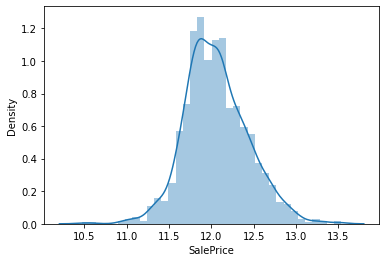

In [236]:
#Log Transformation
df['SalePrice']=np.log1p(df['SalePrice'])

#Looking at the Target Variable after transformation
sns.distplot(df['SalePrice'])

### Test & Train Split

In [237]:
#importing libraries
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import r2_score,mean_squared_error

In [238]:
df_train, df_test = train_test_split(df, train_size=0.8, random_state=100)
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,current_age,remod_age,garage_age,selling_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,...,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
42,85,69.0,9180,5,7,0.0,747,93,0,840,884,0,0,884,1,0,1,0,2,1,5,0,1983.0,2,504,240,0,0,0,0,0,11.877576,39,39,39.0,24,0,0,1,0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
23,120,44.0,4224,5,7,0.0,840,0,200,1040,1060,0,0,1060,1,0,1,0,3,1,6,1,1976.0,2,572,100,110,0,0,0,0,11.774528,46,46,46.0,31,0,0,0,1,0,0,1,0,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
16,20,69.0,11241,6,7,180.0,578,0,426,1004,1004,0,0,1004,1,0,1,0,2,1,5,1,1970.0,2,480,0,0,0,0,0,0,11.911708,52,52,52.0,40,0,0,1,0,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
471,60,92.0,11952,7,6,0.0,0,0,808,808,1161,808,0,1969,0,0,2,1,3,1,8,1,1977.0,2,534,0,0,0,0,276,0,12.154785,45,45,45.0,30,0,0,1,0,0,0,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
760,20,70.0,9100,6,6,0.0,612,0,252,864,864,0,0,864,0,0,1,0,2,1,5,0,2008.0,1,300,0,0,0,0,0,0,11.755879,63,63,14.0,50,0,0,1,0,0,0,1,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [239]:
#scaling using standard scaler
scaler = StandardScaler()

#scaling training dataset
df_train[numeric_columns] = scaler.fit_transform(df_train[numeric_columns])

#scaling test dataset
df_test[numeric_columns] = scaler.transform(df_test[numeric_columns])
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,current_age,remod_age,garage_age,selling_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,...,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
42,0.686652,-0.050276,-0.148385,-0.936031,1.327640,-0.626888,0.650667,0.280315,-1.318808,-0.660328,-0.762212,-0.812605,-0.106703,-1.300443,1.122203,-0.251881,-1.069156,-0.795175,-1.132711,-0.170913,-0.992448,-1.021924,0.172187,0.203655,0.038885,1.162792,-0.726603,-0.353943,-0.119796,-0.284951,-0.068679,-0.503355,-0.319954,0.125430,-0.172187,-0.348165,0,0,1,0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
23,1.536810,-1.289581,-1.357882,-0.936031,1.327640,-0.626888,0.865149,-0.286443,-0.864061,-0.136030,-0.287014,-0.812605,-0.106703,-0.941540,1.122203,-0.251881,-1.069156,-0.795175,0.184424,-0.170913,-0.337222,0.554972,-0.110612,0.203655,0.405810,0.014028,1.008285,-0.353943,-0.119796,-0.284951,-0.068679,-0.782705,-0.082054,0.469921,0.110612,-0.110322,0,0,0,1,0,0,1,0,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
16,-0.892211,-0.050276,0.354595,-0.175551,1.327640,0.395140,0.260910,-0.286443,-0.350198,-0.230403,-0.438213,-0.812605,-0.106703,-1.055736,1.122203,-0.251881,-1.069156,-0.795175,-1.132711,-0.170913,-0.992448,0.554972,-0.353012,0.203655,-0.090618,-0.806518,-0.726603,-0.353943,-0.119796,-0.284951,-0.068679,-0.410825,0.121860,0.765198,0.353012,0.195475,0,0,1,0,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
471,0.079397,1.089885,0.528113,0.584930,0.390222,-0.626888,-1.072105,-0.286443,0.518368,-0.744216,-0.014315,1.058820,-0.106703,0.912116,-0.858045,-0.251881,0.783463,1.191822,0.184424,-0.170913,0.973231,0.554972,-0.070213,0.203655,0.200763,-0.806518,-0.726603,-0.353943,-0.119796,4.344151,-0.068679,0.248126,-0.116040,0.420708,0.070213,-0.144300,0,0,1,0,0,0,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
760,-0.892211,-0.000703,-0.167909,-0.175551,0.390222,-0.626888,0.339323,-0.286443,-0.745827,-0.597412,-0.816211,-0.812605,-0.106703,-1.341228,-0.858045,-0.251881,-1.069156,-0.795175,-1.132711,-0.170913,-0.992448,-1.021924,1.182185,-1.345003,-1.061892,-0.806518,-0.726603,-0.353943,-0.119796,-0.284951,-0.068679,-0.833259,0.495702,1.306541,-1.182185,0.535250,0,0,1,0,0,0,1,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [240]:
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

### General Linear Regression

- Feature Selection Using RFE

In [241]:
#importing libraries from sklearn for regression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE

In [253]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=LinearRegression(), n_features_to_select=50)          
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 53),
 ('LotFrontage', False, 101),
 ('LotArea', False, 28),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 123),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 99),
 ('BsmtHalfBath', False, 133),
 ('FullBath', False, 134),
 ('HalfBath', False, 115),
 ('BedroomAbvGr', False, 135),
 ('KitchenAbvGr', False, 113),
 ('TotRmsAbvGrd', False, 90),
 ('Fireplaces', False, 91),
 ('GarageYrBlt', True, 1),
 ('GarageCars', False, 39),
 ('GarageArea', False, 87),
 ('WoodDeckSF', False, 96),
 ('OpenPorchSF', False, 93),
 ('EnclosedPorch', False, 130),
 ('3SsnPorch', False, 111),
 ('ScreenPorch', False, 85),
 ('PoolArea', False, 128),
 ('current_age', False, 82),
 ('remod_age', False, 76),
 ('garage_age', True, 1),
 ('selling_Age', True, 1),
 ('MSZoning_FV', True, 1),
 (

In [254]:
rfe_columns = X_train.columns[rfe.support_]
rfe_columns

Index(['OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'GarageYrBlt', 'garage_age', 'selling_Age', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrDale',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV',
       'Neighborhood_Veenker', 'Condition1_Norm', 'Condition1_PosN',
       'BldgType_Duplex', 'HouseStyle_2.5Unf', 'RoofStyle_Gambrel',
       'RoofStyle_Shed', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_Stone', 'Exterior2nd_CBlock', 'Foundation_PConc',
       'Foundation_Stone', 'Foundation_Wood', 'BsmtExposure_Gd',
       'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'CentralAir_Y',
       'Electrical_FuseP', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'GarageQual_Fa', 'SaleType_Con', 'SaleType_New',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
     

In [255]:
X_train_rfe = X_train[rfe_columns]
X_test_rfe = X_test[rfe_columns]
X_train_rfe.head()

,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,garage_age,selling_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_BrDale,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_MeadowV,Neighborhood_Veenker,Condition1_Norm,Condition1_PosN,BldgType_Duplex,HouseStyle_2.5Unf,RoofStyle_Gambrel,RoofStyle_Shed,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_Stone,Exterior2nd_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtFinType2_BLQ,BsmtFinType2_GLQ,CentralAir_Y,Electrical_FuseP,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageQual_Fa,SaleType_Con,SaleType_New,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial
42,-0.936031,1.327640,0.650667,0.280315,-1.318808,-0.660328,-0.762212,-0.812605,-0.106703,-1.300443,0.172187,-0.172187,-0.348165,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
23,-0.936031,1.327640,0.865149,-0.286443,-0.864061,-0.136030,-0.287014,-0.812605,-0.106703,-0.941540,-0.110612,0.110612,-0.110322,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
16,-0.175551,1.327640,0.260910,-0.286443,-0.350198,-0.230403,-0.438213,-0.812605,-0.106703,-1.055736,-0.353012,0.353012,0.195475,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
471,0.584930,0.390222,-1.072105,-0.286443,0.518368,-0.744216,-0.014315,1.058820,-0.106703,0.912116,-0.070213,0.070213,-0.144300,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
760,-0.175551,0.390222,0.339323,-0.286443,-0.745827,-0.597412,-0.816211,-0.812605,-0.106703,-1.341228,1.182185,-1.182185,0.535250,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [256]:
# Model building and prediction
lm = LinearRegression()
lm.fit(X_train_rfe, y_train)
y_train_pred = lm.predict(X_train_rfe)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.918809291329184

In [257]:
y_test_pred = lm.predict(X_test_rfe)
r2_score(y_true=y_test, y_pred=y_test_pred)

-2.1769449056796897e+19

### Inference:

- Extreme difference between R-squared values of test and train


- Checking for the conditions of linear regression

<AxesSubplot:ylabel='SalePrice'>

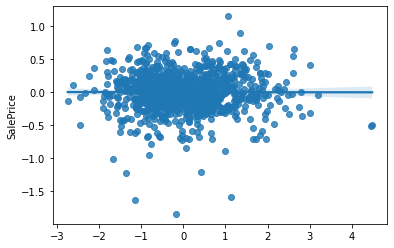

In [258]:
# plotting residues
res = (y_train - y_train_pred)
sns.regplot(y_train_pred,res)

<AxesSubplot:xlabel='SalePrice'>

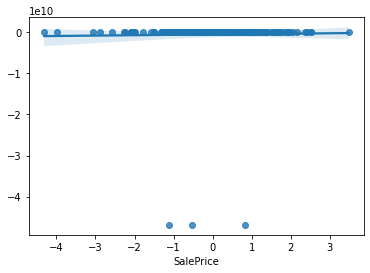

In [259]:
# Check for homoscedacity
fig = plt.figure()
sns.regplot(y_test, y_test_pred)

### Onservation:

- Failure of the assumption. So, we have to regularization

## Regularization

In [260]:
#Rif=dge model with alpha 0.1
ridge1 = Ridge(alpha=0.1)
ridge1.fit(X_train_rfe,y_train)

# train score
y_train_pred = ridge1.predict(X_train_rfe)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

# test score
y_test_pred  = ridge1.predict(X_test_rfe)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

#printing coeff of all columns
list(zip(X_train_rfe.columns,ridge1.coef_))

0.9188714305954844
0.895356447913444


[('OverallQual', 0.2092299984736512),
 ('OverallCond', 0.13817197190318234),
 ('BsmtFinSF1', 0.11358084497304118),
 ('BsmtFinSF2', 0.012203092468173716),
 ('BsmtUnfSF', 0.00631448009685763),
 ('TotalBsmtSF', 0.14163552607001706),
 ('1stFlrSF', 0.12747268956553495),
 ('2ndFlrSF', 0.15901979972974517),
 ('LowQualFinSF', 0.00018273742557075142),
 ('GrLivArea', 0.23630127386927915),
 ('GarageYrBlt', 0.03311084438949392),
 ('garage_age', -0.03311084438991614),
 ('selling_Age', -0.16746523488559192),
 ('MSZoning_FV', 0.8054861829569377),
 ('MSZoning_RH', 0.6470956536397363),
 ('MSZoning_RL', 0.7650407723744198),
 ('MSZoning_RM', 0.6010805892350181),
 ('Neighborhood_BrDale', -0.4392933357656214),
 ('Neighborhood_Crawfor', 0.3809903529846),
 ('Neighborhood_Edwards', -0.15947641541418237),
 ('Neighborhood_MeadowV', -0.40353466819273615),
 ('Neighborhood_Veenker', 0.1506577679820629),
 ('Condition1_Norm', 0.12084876501973563),
 ('Condition1_PosN', 0.1422886819051056),
 ('BldgType_Duplex', -0.371

### Finding the best alpha values from the given list and using Gridsearch

In [263]:

alpha_values = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0, 50.0, 100.0, 500.0, 1000.0 ]}

ridge2 = Ridge()

##Cross-Validation

folds = 5
ridge_model = GridSearchCV(estimator = ridge2, 
                        param_grid = alpha_values, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0,
                                   14.0, 15.0, 16.0, 17.0, 18.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [264]:
ridge_result = pd.DataFrame(ridge_model.cv_results_)
ridge_result.sort_values(by = ['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2,0.004199,0.000399,0.002796,0.000403,0.01,{'alpha': 0.01},-0.208417,-0.216764,-0.207257,-0.250326,-0.217528,-0.220059,0.015702,1,-0.208573,-0.209582,-0.208487,-0.201597,-0.206579,-0.206964,0.002854
1,0.004597,0.000799,0.003401,0.000494,0.001,{'alpha': 0.001},-0.208331,-0.216793,-0.207323,-0.250298,-0.217574,-0.220064,0.015691,2,-0.208559,-0.209561,-0.208498,-0.201579,-0.206546,-0.206949,0.002857
0,0.006197,0.001326,0.004597,0.000800,0.0001,{'alpha': 0.0001},-0.208323,-0.216796,-0.207329,-0.250295,-0.217578,-0.220064,0.015689,3,-0.208558,-0.209559,-0.208499,-0.201578,-0.206543,-0.206947,0.002857
3,0.005198,0.001166,0.003197,0.000398,0.1,{'alpha': 0.1},-0.209081,-0.217021,-0.206685,-0.250572,-0.217120,-0.220096,0.015801,4,-0.208702,-0.209753,-0.208877,-0.201765,-0.206868,-0.207193,0.002872
12,0.004799,0.000748,0.002797,0.000399,1.0,{'alpha': 1.0},-0.210640,-0.219610,-0.204471,-0.251736,-0.214615,-0.220214,0.016522,5,-0.209970,-0.210710,-0.211434,-0.202921,-0.208578,-0.208723,0.003051
11,0.004797,0.000750,0.002598,0.000490,0.9,{'alpha': 0.9},-0.210598,-0.219602,-0.204559,-0.251651,-0.214737,-0.220230,0.016470,6,-0.209877,-0.210641,-0.211243,-0.202798,-0.208449,-0.208602,0.003049
10,0.005197,0.000400,0.002198,0.000399,0.8,{'alpha': 0.8},-0.210542,-0.219583,-0.204657,-0.251560,-0.214857,-0.220240,0.016415,7,-0.209774,-0.210571,-0.211036,-0.202674,-0.208309,-0.208473,0.003044
13,0.006396,0.001624,0.004398,0.001018,2.0,{'alpha': 2.0},-0.211442,-0.219841,-0.204032,-0.252551,-0.213398,-0.220253,0.016918,8,-0.210722,-0.211432,-0.212975,-0.203813,-0.209708,-0.209730,0.003144
9,0.004797,0.001166,0.003198,0.000398,0.7,{'alpha': 0.7},-0.210470,-0.219541,-0.204785,-0.251461,-0.215077,-0.220267,0.016348,9,-0.209669,-0.210493,-0.210809,-0.202552,-0.208161,-0.208337,0.003034
4,0.006194,0.001166,0.003199,0.000746,0.2,{'alpha': 0.2},-0.209562,-0.218124,-0.206215,-0.250791,-0.216724,-0.220283,0.015880,10,-0.208885,-0.209910,-0.209353,-0.201923,-0.207137,-0.207442,0.002912


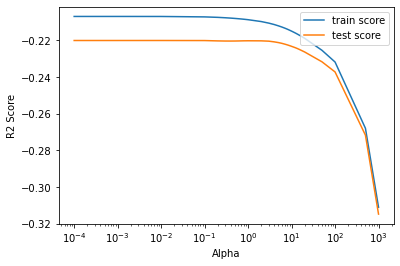

In [265]:
plt.plot(ridge_result['param_alpha'], ridge_result['mean_train_score'])
plt.plot(ridge_result['param_alpha'], ridge_result['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [266]:
ridge_model.best_estimator_

Ridge(alpha=0.01)

### Observation:

- Best alpha value is 0.01

In [267]:
ridge = Ridge(alpha=0.01)

ridge.fit(X_train_rfe, y_train)
print("Intercept: ", ridge.intercept_)
list(zip(X_train_rfe.columns,ridge1.coef_))

Intercept:  -0.9687508685938625


[('OverallQual', 0.2092299984736512),
 ('OverallCond', 0.13817197190318234),
 ('BsmtFinSF1', 0.11358084497304118),
 ('BsmtFinSF2', 0.012203092468173716),
 ('BsmtUnfSF', 0.00631448009685763),
 ('TotalBsmtSF', 0.14163552607001706),
 ('1stFlrSF', 0.12747268956553495),
 ('2ndFlrSF', 0.15901979972974517),
 ('LowQualFinSF', 0.00018273742557075142),
 ('GrLivArea', 0.23630127386927915),
 ('GarageYrBlt', 0.03311084438949392),
 ('garage_age', -0.03311084438991614),
 ('selling_Age', -0.16746523488559192),
 ('MSZoning_FV', 0.8054861829569377),
 ('MSZoning_RH', 0.6470956536397363),
 ('MSZoning_RL', 0.7650407723744198),
 ('MSZoning_RM', 0.6010805892350181),
 ('Neighborhood_BrDale', -0.4392933357656214),
 ('Neighborhood_Crawfor', 0.3809903529846),
 ('Neighborhood_Edwards', -0.15947641541418237),
 ('Neighborhood_MeadowV', -0.40353466819273615),
 ('Neighborhood_Veenker', 0.1506577679820629),
 ('Condition1_Norm', 0.12084876501973563),
 ('Condition1_PosN', 0.1422886819051056),
 ('BldgType_Duplex', -0.371

In [268]:
y_train_pred = ridge.predict(X_train_rfe)

y_test_pred  = ridge.predict(X_test_rfe)

In [270]:
##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_train_pred)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_test_pred)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_train_pred)
MSE_lasso_test = mean_squared_error(y_test, y_test_pred)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("Ridge Regression Model (alpha=0.01):\n")
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nRMSE score:",RMSE_lasso_test,"\n")

Ridge Regression Model (alpha=0.01):


For Train Set:
R2 score: 0.9189132221391941 
MSE score: 0.08108677786080591 
RMSE score: 0.2847574017664965

For Test Set:
R2 score: 0.896325195911666 
MSE score: 0.1185059313742948 
RMSE score: 0.34424690466915575 



### Evaluation of Assumptions - Ridge Regression

1. Linearity of the model
2. Homoscedacity
3. Independence of Error terms 
4. Normality of error terms
5. Multicollineraity

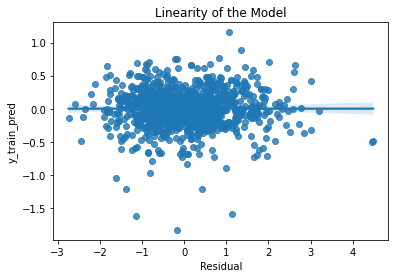

In [276]:
# Linearity of the model
res = (y_train - y_train_pred)
sns.regplot(y_train_pred,res)
plt.title("Linearity of the Model")
plt.ylabel("y_train_pred")
plt.xlabel("Residual")
plt.show()

Text(0, 0.5, 'y_pred')

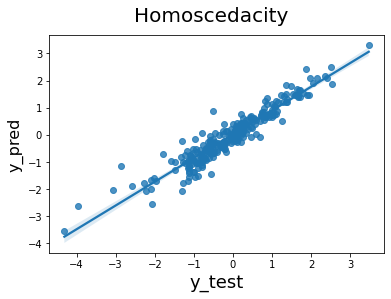

In [277]:
#Homoscedacity
fig = plt.figure()
sns.regplot(y_test, y_test_pred)
fig.suptitle('Homoscedacity', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

Text(0, 0.5, 'Error Terms')

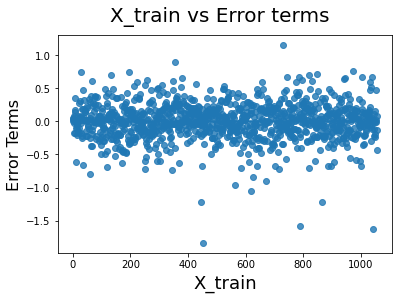

In [274]:
#Independence of Error terms 
fig = plt.figure()

#changing to 1D since Xtrain is not 1D
temp = [i for i in range(0,len(X_train_rfe),1)]

#plotting
sns.regplot(temp, res)
fig.suptitle('X_train vs Error terms', fontsize = 20)              # Plot heading 
plt.xlabel('X_train', fontsize = 18)                          # X-label
plt.ylabel('Error Terms', fontsize = 16)

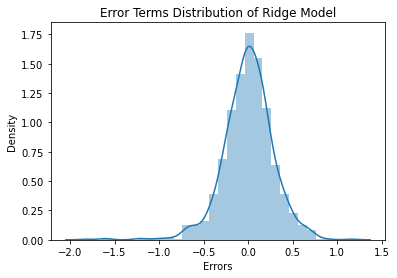

In [275]:
# Normality of error terms
res = (y_train - y_train_pred)     #residuals
sns.distplot(res , bins = 30)
plt.title('Error Terms Distribution of Ridge Model')               
plt.xlabel('Errors') 
plt.show()

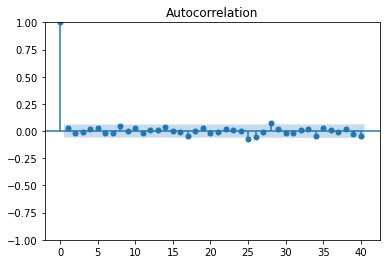

In [278]:
#Multicollinearity

import statsmodels.tsa.api as smt
autocor = smt.graphics.plot_acf(res, lags=40 , alpha=0.05)
autocor.show()

### Observation :

- All the assumptions holds good and are verified

### Top features

In [279]:
ridge_df = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Absolute value':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Absolute value', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  
top5_ridge = ridge_df.Features[0:5]
print('The Top 5 Features as per Ridge model is\n',top5_ridge)

#Dataframe rdige_df
ridge_df.head(10)  #Top10

The Top 5 Features as per Ridge model is
 0         MSZoning_FV
1         MSZoning_RL
2         MSZoning_RH
3         MSZoning_RM
4    Foundation_Stone
Name: Features, dtype: object


,Features,Coefficient,Absolute value
0,MSZoning_FV,0.9145,0.9145
1,MSZoning_RL,0.8721,0.8721
2,MSZoning_RH,0.7632,0.7632
3,MSZoning_RM,0.7081,0.7081
4,Foundation_Stone,0.5111,0.5111
5,SaleCondition_AdjLand,0.4894,0.4894
6,Neighborhood_BrDale,-0.4423,0.4423
7,Neighborhood_MeadowV,-0.4089,0.4089
8,Neighborhood_Crawfor,0.3813,0.3813
9,BldgType_Duplex,-0.3764,0.3764


## Lasso Regression

In [282]:
lasso1 = Lasso(alpha=0.0001)
lasso1.fit(X_train,y_train)

# train score
y_train_pred = lasso1.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

# test score
y_test_pred  = lasso1.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))
print(len(lasso1.coef_))
#printing coeff of all columns
list(zip(X_train.columns,lasso1.coef_))

0.9480497231003272
0.8999506385188403
197


[('MSSubClass', -0.0462599024180368),
 ('LotFrontage', 0.01927239504966066),
 ('LotArea', 0.06834117155463298),
 ('OverallQual', 0.13767280415949884),
 ('OverallCond', 0.1203237372246701),
 ('MasVnrArea', 0.011086146955422926),
 ('BsmtFinSF1', 0.07225633750725824),
 ('BsmtFinSF2', 0.01916651182866513),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.11291024087978366),
 ('1stFlrSF', 0.12737683628975907),
 ('2ndFlrSF', 0.1961516870825586),
 ('LowQualFinSF', 0.0047253409170668744),
 ('GrLivArea', 0.1119188499359038),
 ('BsmtFullBath', 0.025816659473010213),
 ('BsmtHalfBath', 0.006404585473783564),
 ('FullBath', 0.008653679752970378),
 ('HalfBath', 0.014584832427085057),
 ('BedroomAbvGr', -0.00846291916070517),
 ('KitchenAbvGr', -0.021893467204828473),
 ('TotRmsAbvGrd', 0.04392164779432475),
 ('Fireplaces', 0.02764298599200101),
 ('GarageYrBlt', 0.0),
 ('GarageCars', 0.055376050116418586),
 ('GarageArea', 0.03196846073031114),
 ('WoodDeckSF', 0.023336862469336122),
 ('OpenPorchSF', 0.03050530274

In [284]:
alpha_values = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0, 50.0, 100.0, 500.0, 1000.0 ]}

lasso2 = Lasso()

##Cross-Validation

folds = 5
lasso_model = GridSearchCV(estimator = lasso2, 
                        param_grid = alpha_values, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0,
                                   14.0, 15.0, 16.0, 17.0, 18.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [285]:
lasso_result = pd.DataFrame(lasso_model.cv_results_)
lasso_result.sort_values(by = ['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.049370,9.194242e-03,0.003399,0.000800,0.0001,{'alpha': 0.0001},-0.209358,-0.217870,-0.206680,-0.251320,-0.216453,-0.220336,0.016051,1,-0.208932,-0.209951,-0.209103,-0.202076,-0.207157,-0.207443,0.002834
1,0.032381,7.983455e-04,0.003199,0.000400,0.001,{'alpha': 0.001},-0.212550,-0.219720,-0.207414,-0.254749,-0.211616,-0.221210,0.017231,2,-0.212811,-0.213608,-0.215552,-0.206362,-0.212597,-0.212186,0.003093
2,0.007394,1.019310e-03,0.003399,0.000800,0.01,{'alpha': 0.01},-0.237881,-0.243804,-0.240919,-0.266874,-0.230373,-0.243970,0.012295,3,-0.237685,-0.238461,-0.240232,-0.228806,-0.238059,-0.236649,0.004017
3,0.005797,3.983977e-04,0.003397,0.000800,0.1,{'alpha': 0.1},-0.279247,-0.315783,-0.300645,-0.291888,-0.306480,-0.298809,0.012497,4,-0.299807,-0.297537,-0.293843,-0.295500,-0.296330,-0.296603,0.002002
4,0.004998,6.320331e-04,0.003398,0.000489,0.2,{'alpha': 0.2},-0.350583,-0.385749,-0.352259,-0.331326,-0.368822,-0.357748,0.018365,5,-0.360488,-0.358124,-0.352127,-0.351434,-0.353135,-0.355062,0.003586
5,0.005397,4.898046e-04,0.003797,0.001326,0.3,{'alpha': 0.3},-0.443715,-0.464159,-0.417309,-0.384788,-0.441201,-0.430235,0.027149,6,-0.436054,-0.433902,-0.420050,-0.421594,-0.424507,-0.427221,0.006528
6,0.005797,7.477548e-04,0.002798,0.000748,0.4,{'alpha': 0.4},-0.539083,-0.544526,-0.473449,-0.440067,-0.516407,-0.502706,0.040099,7,-0.511985,-0.508735,-0.488349,-0.492594,-0.495828,-0.499498,0.009238
7,0.004996,8.955355e-04,0.003198,0.000979,0.5,{'alpha': 0.5},-0.621372,-0.626354,-0.531205,-0.499032,-0.587975,-0.573188,0.050256,8,-0.583627,-0.582084,-0.557509,-0.563631,-0.566374,-0.570645,0.010386
8,0.005197,7.481004e-04,0.003198,0.001166,0.6,{'alpha': 0.6},-0.692831,-0.709512,-0.591755,-0.561842,-0.659250,-0.643038,0.057243,9,-0.646888,-0.653135,-0.629181,-0.633339,-0.638644,-0.640237,0.008752
9,0.005998,6.318180e-04,0.002997,0.000895,0.7,{'alpha': 0.7},-0.762277,-0.784988,-0.652219,-0.619775,-0.721498,-0.708151,0.063167,10,-0.709742,-0.717866,-0.701596,-0.698990,-0.700562,-0.705751,0.007108


alpha 0.0001 is the optimal model

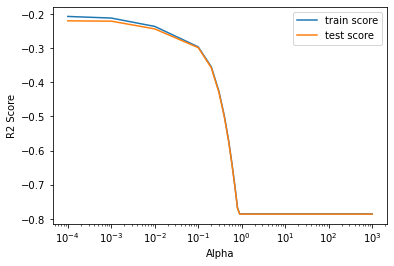

In [286]:
plt.plot(lasso_result['param_alpha'], lasso_result['mean_train_score'])
plt.plot(lasso_result['param_alpha'], lasso_result['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [288]:
lasso_model.best_estimator_

Lasso(alpha=0.0001)

In [289]:
lasso = Lasso(alpha=0.0001)
        
lasso.fit(X_train, y_train) 
print("Intercept: ",lasso.intercept_)
print("Coefficients:\n ",lasso.coef_)

Intercept:  -1.108648510290528
Coefficients:
  [-4.62599024e-02  1.92723950e-02  6.83411716e-02  1.37672804e-01
  1.20323737e-01  1.10861470e-02  7.22563375e-02  1.91665118e-02
 -0.00000000e+00  1.12910241e-01  1.27376836e-01  1.96151687e-01
  4.72534092e-03  1.11918850e-01  2.58166595e-02  6.40458547e-03
  8.65367975e-03  1.45848324e-02 -8.46291916e-03 -2.18934672e-02
  4.39216478e-02  2.76429860e-02  0.00000000e+00  5.53760501e-02
  3.19684607e-02  2.33368625e-02  3.05053027e-02  7.68235061e-03
  1.48912628e-02  3.82215250e-02  7.56746200e-03 -1.91617480e-02
 -3.99074583e-02 -7.64863641e-03 -1.34497774e-01  7.50347448e-01
  6.51112014e-01  5.85018940e-01  4.80636409e-01  1.81418513e-02
  0.00000000e+00 -1.90958545e-02 -0.00000000e+00 -8.91918483e-02
 -6.22880959e-02  5.78218784e-02 -7.39715936e-02 -2.15819851e-01
 -1.14329025e-02 -1.10156913e-02 -4.15363755e-01 -0.00000000e+00
 -7.27168861e-02  1.74113679e-01  1.22234764e-01 -6.75778582e-02
  3.23980420e-01 -1.61978610e-01 -8.8750461

In [290]:
y_train_pred = lasso.predict(X_train)

#predicting test set
y_test_pred  = lasso.predict(X_test)

In [291]:
##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_train_pred)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_test_pred)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_train_pred)
MSE_lasso_test = mean_squared_error(y_test, y_test_pred)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("Lasso Regression Model (alpha=0.0001):\n")
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nRMSE score:",RMSE_lasso_test,"\n")

Lasso Regression Model (alpha=0.0001):


For Train Set:
R2 score: 0.9480497231003272 
MSE score: 0.05195027689967285 
RMSE score: 0.22792603383482293

For Test Set:
R2 score: 0.8999506385188403 
MSE score: 0.11436185358620292 
RMSE score: 0.33817429468574767 



### Evaluation of Assumptions - Lasso Regression

1. Linearity of the model
2. Homoscedacity
3. Independence of Error terms 
4. Normality of error terms
5. Multicollineraity

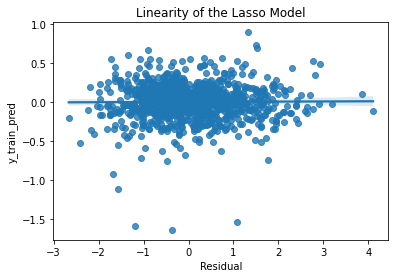

In [292]:
res = (y_train - y_train_pred)
sns.regplot(y_train_pred,res)
plt.title("Linearity of the Lasso Model")
plt.ylabel("y_train_pred")
plt.xlabel("Residual")
plt.show()

Text(0, 0.5, 'y_pred')

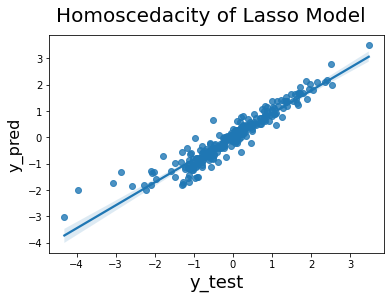

In [293]:
fig = plt.figure()
sns.regplot(y_test, y_test_pred)
fig.suptitle('Homoscedacity of Lasso Model', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

Text(0, 0.5, 'Error Terms')

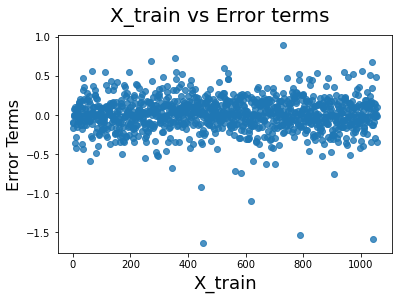

In [295]:
fig = plt.figure()

#changing to 1D since Xtrain is not 1D
temp = [i for i in range(0,len(X_train),1)]

#plotting
sns.regplot(temp, res)
fig.suptitle('X_train vs Error terms', fontsize = 20)              # Plot heading 
plt.xlabel('X_train', fontsize = 18)                          # X-label
plt.ylabel('Error Terms', fontsize = 16)

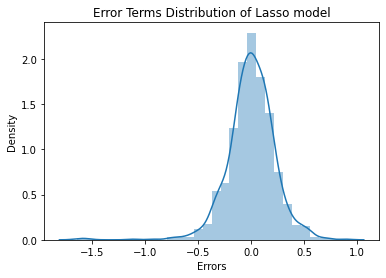

In [296]:
res = (y_train - y_train_pred)    
sns.distplot(res , bins = 30)
plt.title('Error Terms Distribution of Lasso model')               
plt.xlabel('Errors') 
plt.show()

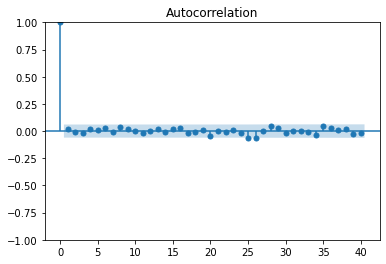

In [297]:
import statsmodels.tsa.api as smt
autocor = smt.graphics.plot_acf(res, lags=40 , alpha=0.05)
autocor.show()

### Observation :

- All the assumptions holds good and are verified

### Top Features

In [298]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), 
                         'Absolute value':abs(lasso.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Absolute value', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)
top5_lasso = lasso_df.Features[0:5]
print('The Top 5 Features as per Lasso model is\n', top5_lasso)

#Dataframe lasso_df
lasso_df.head(10)  #Top10

The Top 5 Features as per Lasso model is
 0              MSZoning_FV
1    SaleCondition_AdjLand
2              MSZoning_RH
3              MSZoning_RL
4              MSZoning_RM
Name: Features, dtype: object


,Features,Coefficient,Absolute value
0,MSZoning_FV,0.7503,0.7503
1,SaleCondition_AdjLand,0.6920,0.6920
2,MSZoning_RH,0.6511,0.6511
3,MSZoning_RL,0.5850,0.5850
4,MSZoning_RM,0.4806,0.4806
5,LandSlope_Sev,-0.4154,0.4154
6,Foundation_Stone,0.3843,0.3843
7,Neighborhood_StoneBr,0.3569,0.3569
8,Foundation_Wood,-0.3489,0.3489
9,Electrical_FuseP,-0.3346,0.3346


# Part 2

### 1.Doubled alpha rate -Ridge

In [303]:
##Checking the coefficient values with lambda (alpha) = 0.02

ridge = Ridge(alpha=0.02)

ridge.fit(X_train_rfe, y_train)

# predicting training set
y_train_pred = ridge.predict(X_train_rfe)

#predicting test set
y_test_pred  = ridge.predict(X_test_rfe)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_train_pred)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_test_pred)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_train_pred)
MSE_lasso_test = mean_squared_error(y_test, y_test_pred)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("Ridge Regression Model with doubled alpha rate (alpha=0.02):\n")
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nRMSE score:",RMSE_lasso_test,"\n")

Ridge Regression Model with doubled alpha rate (alpha=0.02):


For Train Set:
R2 score: 0.918911638036245 
MSE score: 0.08108836196375499 
RMSE score: 0.28476018324856267

For Test Set:
R2 score: 0.8962235579513032 
MSE score: 0.11862210908267533 
RMSE score: 0.3444156051671807 



In [302]:
ridge_df = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Absolute value':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Absolute value', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#Dataframe rdige_df
ridge_df.head(10)

,Features,Coefficient,Absolute value
0,MSZoning_FV,0.9007,0.9007
1,MSZoning_RL,0.8587,0.8587
2,MSZoning_RH,0.7485,0.7485
3,MSZoning_RM,0.6946,0.6946
4,Foundation_Stone,0.5049,0.5049
5,SaleCondition_AdjLand,0.4841,0.4841
6,Neighborhood_BrDale,-0.4420,0.4420
7,Neighborhood_MeadowV,-0.4083,0.4083
8,Neighborhood_Crawfor,0.3813,0.3813
9,BldgType_Duplex,-0.3758,0.3758


### Doubled alpha for Lasso

In [306]:
#Alpha = 0.0002

lasso = Lasso(alpha=0.0002)
        
lasso.fit(X_train, y_train) 

# predicting training set
y_train_pred = lasso.predict(X_train)

#predicting test set
y_test_pred  = lasso.predict(X_test)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_train_pred)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_test_pred)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_train_pred)
MSE_lasso_test = mean_squared_error(y_test, y_test_pred)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("Lasso Regression Model with doubled alpha rate (alpha=0.0016):\n")
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nRMSE score:",RMSE_lasso_test,"\n")

Lasso Regression Model with doubled alpha rate (alpha=0.0016):


For Train Set:
R2 score: 0.9468427985724301 
MSE score: 0.053157201427569904 
RMSE score: 0.23055845555426915

For Test Set:
R2 score: 0.8969569498515764 
MSE score: 0.11778380231211034 
RMSE score: 0.3431964485715293 



In [307]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), 
                         'Absolute value':abs(lasso.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Absolute value', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)

#Dataframe lasso_df
lasso_df.head(10)  #Top10

,Features,Coefficient,Absolute value
0,MSZoning_FV,0.5143,0.5143
1,SaleCondition_AdjLand,0.5096,0.5096
2,MSZoning_RH,0.3767,0.3767
3,MSZoning_RL,0.3517,0.3517
4,LandSlope_Sev,-0.3514,0.3514
5,Neighborhood_StoneBr,0.3422,0.3422
6,Neighborhood_Crawfor,0.3222,0.3222
7,Foundation_Wood,-0.3165,0.3165
8,Neighborhood_MeadowV,-0.2789,0.2789
9,Foundation_Stone,0.2652,0.2652


### 2.Identifying new potential top 5 features excluding old top 5

### Lasso Regression with aplha = 0.0001

In [308]:
X_train = X_train.drop(top5_lasso,axis=1)
X_test = X_test.drop(top5_lasso,axis=1)

In [309]:
lasso = Lasso(alpha=0.0008)
        
lasso.fit(X_train, y_train) 

# predicting training set
y_train_pred = lasso.predict(X_train)

#predicting test set
y_test_pred  = lasso.predict(X_test)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_train_pred)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_test_pred)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_train_pred)
MSE_lasso_test = mean_squared_error(y_test, y_test_pred)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("Lasso Regression Model (alpha=0.0008):\n")
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nRMSE score:",RMSE_lasso_test,"\n")

Lasso Regression Model (alpha=0.0008):


For Train Set:
R2 score: 0.9400516572013397 
MSE score: 0.059948342798660355 
RMSE score: 0.2448435067520892

For Test Set:
R2 score: 0.8938502771857096 
MSE score: 0.12133489788427966 
RMSE score: 0.34833159185505935 



In [310]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), 
                         'Absolute value':abs(lasso.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Absolute value', ascending=False)
lasso_df.reset_index(drop=True, inplace=True) 
top5_lasso = lasso_df.Features[0:5]
print('The Top 5 Features as per Lasso model is\n',top5_lasso)

#Dataframe lasso_df
lasso_df.head(10)  #Top10

The Top 5 Features as per Lasso model is
 0    Neighborhood_Crawfor
1    Neighborhood_StoneBr
2               GrLivArea
3    Neighborhood_MeadowV
4     Exterior1st_BrkFace
Name: Features, dtype: object


,Features,Coefficient,Absolute value
0,Neighborhood_Crawfor,0.3335,0.3335
1,Neighborhood_StoneBr,0.3062,0.3062
2,GrLivArea,0.2923,0.2923
3,Neighborhood_MeadowV,-0.2463,0.2463
4,Exterior1st_BrkFace,0.2032,0.2032
5,OverallQual,0.1696,0.1696
6,CentralAir_Y,0.1539,0.1539
7,SaleCondition_Normal,0.1456,0.1456
8,Condition1_Norm,0.1420,0.1420
9,Neighborhood_Somerst,0.1396,0.1396
